<a href="https://colab.research.google.com/github/vishnukanduri/Trading-Bot/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Dependencies

In [ ]:
# gym requires tensorflow version < 2.0
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 412.3MB 42kB/s 
     |████████████████████████████████| 245kB 34.7MB/s 
     |████████████████████████████████| 174kB 35.9MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 3.8MB 46.5MB/s 
     |████████████████████████████████| 512kB 51.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=a1fdfaa5100210a856296b1200accb1b752127ea40b299de1c463fd7bbbef16a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorfl

In [ ]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [ ]:
# Gym stuff by OpenAI
# gym_anytrading requires gym 
import gym
# trading environment for RL
import gym_anytrading

# Stable baselines - Reinforcement learning
# DummyVecEnv is a wrapper
from stable_baselines.common.vec_env import DummyVecEnv
# A2C is a RL model. There are many more models available
from stable_baselines import A2C

# Processing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Bring in Marketwatch GME Data

In [ ]:
df = pd.read_csv('/content/GME_Jan 01_Mar 18.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/18/2021,214.00,218.88,195.65,201.75,"11,799,910"
1,03/17/2021,217.84,231.47,204.00,209.81,"16,481,590"
2,03/16/2021,203.16,220.70,172.35,208.17,"35,422,871"
3,03/15/2021,277.52,283.00,206.00,220.14,"24,226,189"
4,03/12/2021,275.00,295.50,262.27,264.50,"25,845,900"


In [ ]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,19.00,19.10,17.15,17.25,"10,022,470"
2021-01-05,17.35,18.08,17.23,17.37,"4,961,457"
2021-01-06,17.34,18.98,17.33,18.36,"6,056,248"
2021-01-07,18.47,19.45,18.02,18.08,"6,129,276"
2021-01-08,18.18,18.30,17.08,17.69,"6,481,960"


In [ ]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
# gym requires date to be in the date dtype
df['Date'] = pd.to_datetime(df['Date'])
# gym also expects date to be the index
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-18,214.00,218.88,195.65,201.75,"11,799,910"
2021-03-17,217.84,231.47,204.00,209.81,"16,481,590"
2021-03-16,203.16,220.70,172.35,208.17,"35,422,871"
2021-03-15,277.52,283.00,206.00,220.14,"24,226,189"
2021-03-12,275.00,295.50,262.27,264.50,"25,845,900"


# Default Environment

In [ ]:
# stocks-v0: stocks environment. There is also for forex
# frame_bound: consdier rows between 1st and 2nd argument. 1st arg must be atleast window_size
# window_size: number of previous observations to consdier for prediction
env = gym.make('stocks-v0', df=df, frame_bound=(5,50), window_size=5)

In [ ]:
# closing prices for each day
env.prices

array([201.75, 209.81, 208.17, 220.14, 264.5 , 260.  , 265.  , 246.9 ,
       194.5 , 137.74, 132.35, 124.18, 118.18, 120.4 , 101.74, 108.73,
        91.71,  44.97,  46.  ,  40.59,  40.69,  45.94,  49.51,  52.4 ,
        51.1 ,  51.2 ,  50.31,  60.  ,  63.77,  53.5 ,  92.41,  90.  ,
       225.  , 325.  , 193.6 , 347.51, 147.98,  76.79,  65.01,  43.03,
        39.12,  39.36,  35.5 ,  39.91,  31.4 ,  19.95,  19.94,  17.69,
        18.08,  18.36])

In [ ]:
# signal features: price and the difference in price from previous day
# Additional signal features can also be added
env.signal_features

array([[ 2.0175e+02,  0.0000e+00],
       [ 2.0981e+02,  8.0600e+00],
       [ 2.0817e+02, -1.6400e+00],
       [ 2.2014e+02,  1.1970e+01],
       [ 2.6450e+02,  4.4360e+01],
       [ 2.6000e+02, -4.5000e+00],
       [ 2.6500e+02,  5.0000e+00],
       [ 2.4690e+02, -1.8100e+01],
       [ 1.9450e+02, -5.2400e+01],
       [ 1.3774e+02, -5.6760e+01],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,

# Build Environment

In [ ]:
# initializes environment: first 5 observations as window_size = 5 
state = env.reset()
state

array([[201.75,   0.  ],
       [209.81,   8.06],
       [208.17,  -1.64],
       [220.14,  11.97],
       [264.5 ,  44.36]])

In [ ]:
# action space consists of 2 values. Buy, Sell
env.action_space

Discrete(2)

In [ ]:
while True:
    # randomly selecting an action
    action = env.action_space.sample()
    # result of taking this action in the environment
    # n_state: current state after taking the action
    # done: if it has ended, then True
    # info: information of RL agent
    n_state, reward, done, info = env.step(action)
    if done: 
        print('info: ', info)
        break

info:  {'total_reward': -41.780000000000015, 'total_profit': 1.0232392466705853, 'position': 0}


The model made a profit of 2.3% (total_profit - 1) by taking random actions

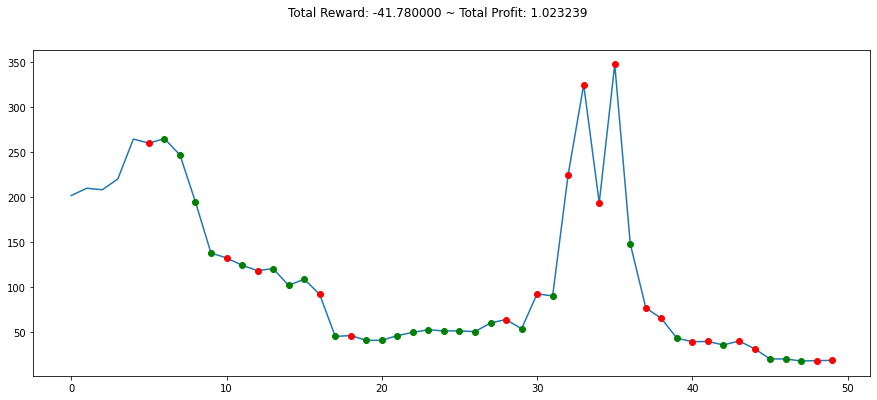

In [ ]:
# Visualizing the agent's actions
plt.figure(figsize=(15,6))
env.render_all()
plt.show()

Red is shorting. Green is long term. 

# Adding Custom Indicators

## Install and Import Dependencies

In [ ]:
!pip install finta

In [ ]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## Fix Volume Column

In [ ]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
# Volume is a string. Neeed to convert into float for technical indicators to work
df['Volume'] = df['Volume'].apply(lambda x: float(x))
df['Volume']

Date
2021-01-04     10022470.0
2021-01-05      4961457.0
2021-01-06      6056248.0
2021-01-07      6129276.0
2021-01-08      6481960.0
2021-01-11     14927610.0
2021-01-12      7060665.0
2021-01-13    144501703.0
2021-01-14     93717406.0
2021-01-15     46866359.0
2021-01-19     74721922.0
2021-01-20     33471789.0
2021-01-21     57079754.0
2021-01-22    197157906.0
2021-01-25    177874000.0
2021-01-26    178588000.0
2021-01-27     93396672.0
2021-01-28     58815809.0
2021-01-29     50566059.0
2021-02-01     37382152.0
2021-02-02     78183070.0
2021-02-03     42698512.0
2021-02-04     62427281.0
2021-02-05     81345008.0
2021-02-08     25687279.0
2021-02-09     26843080.0
2021-02-10     36455039.0
2021-02-11     13056730.0
2021-02-12     14573260.0
2021-02-16      8175030.0
2021-02-17      9260795.0
2021-02-18     23990561.0
2021-02-19     14828240.0
2021-02-22     19476020.0
2021-02-23      7565215.0
2021-02-24     83111742.0
2021-02-25    150308797.0
2021-02-26     92194148.0
2021-03

In [ ]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## Calculate SMA, RSI, and OBV

In [ ]:
# For simple moving average (SMA), windows size is 12. So, first 11 entries will be NaN 
df['SMA'] = TA.SMA(df, 12)
# Relative strength index
df['RSI'] = TA.RSI(df)
# On balance volume
df['OBV'] = TA.OBV(df)
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-01-04,19.00,19.10,17.15,17.25,10022470.0,NaN,NaN,NaN
2021-01-05,17.35,18.08,17.23,17.37,4961457.0,NaN,100.000000,4961457.0
2021-01-06,17.34,18.98,17.33,18.36,6056248.0,NaN,100.000000,11017705.0
2021-01-07,18.47,19.45,18.02,18.08,6129276.0,NaN,78.507089,4888429.0
2021-01-08,18.18,18.30,17.08,17.69,6481960.0,NaN,59.367411,-1593531.0
2021-01-11,19.41,20.65,19.01,19.94,14927610.0,NaN,83.842012,13334079.0
2021-01-12,19.96,20.40,19.32,19.95,7060665.0,NaN,83.888461,20394744.0
2021-01-13,20.42,38.65,20.03,31.40,144501703.0,NaN,96.454897,164896447.0
2021-01-14,38.09,43.06,33.05,39.91,93717406.0,NaN,97.817439,258613853.0


In [ ]:
df.fillna(0, inplace=True)
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2021-01-04,19.00,19.10,17.15,17.25,10022470.0,0.000000,0.000000,0.0
2021-01-05,17.35,18.08,17.23,17.37,4961457.0,0.000000,100.000000,4961457.0
2021-01-06,17.34,18.98,17.33,18.36,6056248.0,0.000000,100.000000,11017705.0
2021-01-07,18.47,19.45,18.02,18.08,6129276.0,0.000000,78.507089,4888429.0
2021-01-08,18.18,18.30,17.08,17.69,6481960.0,0.000000,59.367411,-1593531.0
2021-01-11,19.41,20.65,19.01,19.94,14927610.0,0.000000,83.842012,13334079.0
2021-01-12,19.96,20.40,19.32,19.95,7060665.0,0.000000,83.888461,20394744.0
2021-01-13,20.42,38.65,20.03,31.40,144501703.0,0.000000,96.454897,164896447.0
2021-01-14,38.09,43.06,33.05,39.91,93717406.0,0.000000,97.817439,258613853.0


## Create Custom Environment

In [ ]:
# function to add signals to the environment
def add_signals(env):
    # getting start index
    start = env.frame_bound[0] - env.window_size
    # getting end index
    end = env.frame_bound[1]
    # using the low column from start to end indices as prices
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
# creating a custom environment by inheriting from StocksEnv class and modifying _process_data to get the prices and signal 
# features as decided by add_signals rather than the native signals which are price and change in price from previous step 
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=8, frame_bound=(8,40))

# Build Environment and Train 

In [ ]:
# training a custom environment
env_maker = lambda: env2
# training the default environment (with default prices and signal_features)
# env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,70), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | -0.517   |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 37.2     |
---------------------------------
---------------------------------
| explained_variance | -4.6     |
| fps                | 296      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 0.00226  |
---------------------------------
---------------------------------
| explained_variance | -0.00151 |
| fps                | 319      |
| nupdates           | 200      |
| policy_entropy     | 0.691    |
| total_timesteps    | 1000     |
| value_loss         | 15.8     |
---------------------------------
----------------------------------
| explained_variance | -0.000195 |
| fps                | 336       |
| nupdates           | 300       |
| policy_entropy     | 0.689     |
| total_t

KeyboardInterrupt: ignored

Since, we got explained_variance as 0.972 which is a high value, execution has been interrupted.

explained_variance: value between 0 and 1. We need a value closer to 1. If so, the model is learning all the patterns in the data. 
value_loss must be a small value.

# Evaluation

In [ ]:
# custom environment
env = MyCustomEnv(df=df, window_size=8, frame_bound=(41, 60))
# default environment
# env = gym.make('stocks-v0', df=df, frame_bound=(49, 52), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if done:
        print('info', info)
        break

info {'total_reward': 81.00999999999999, 'total_profit': 1.8050309773599043, 'position': 1}


Default env: This model traded for the last 3 days and lost 2.2% of money.

Custom env: Is making significant profits (80%) for days between 41 and 60.

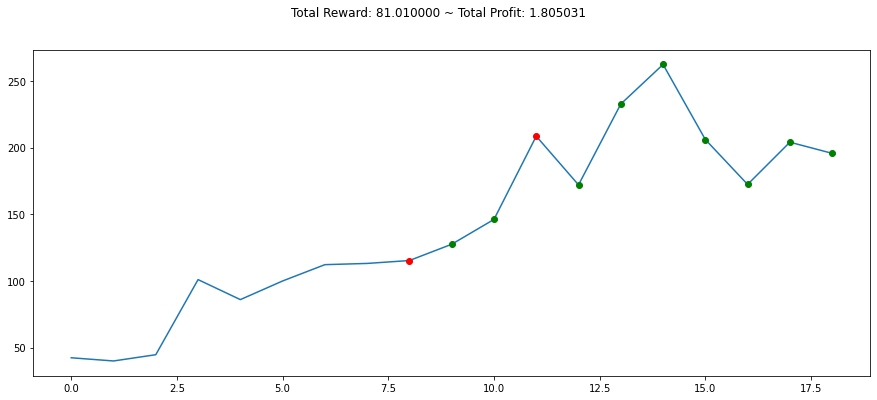

In [ ]:
# custom env
plt.figure(figsize=(15,6))
env.render_all()
plt.show()

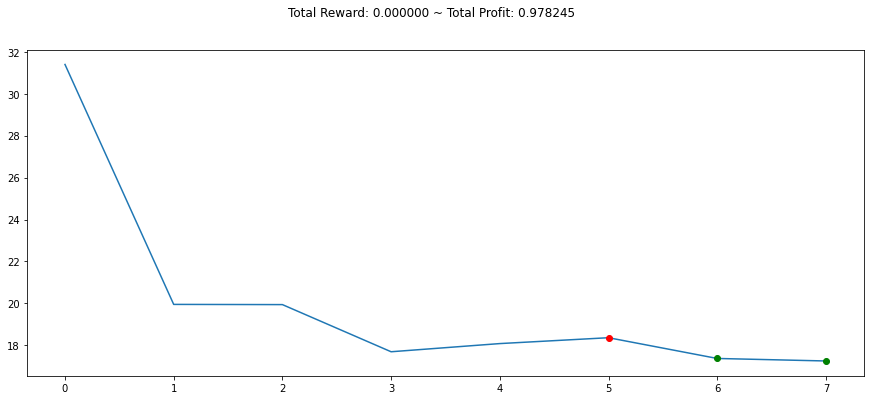

In [ ]:
# default env
plt.figure(figsize=(15,6))
env.render_all()
plt.show()